
Program Requirements:

1. Automate data manipulation process.

2. Easily reproduce analysis on different datasets using similar formats - saves time.

3. Import necessary libraries.

4. Research how to install and missing packages, if necessary.

5. Give short, cogent answers to the following questions (in *your* words):

	a. What is AI?

	b. What is machine language?

	c. What is deep learning and neural networks?

	d. What is natural language processing (NLP)?

Research differences between TensorFlow and PyTorch

	a. What are they used for?

	b. List differences.

	c. Why would you use one over the other?

Download .csv dataset

Create at least three functions that are called by the program:

	a. main(): calls at least two other functions

	b. get_requirements(): displays the program requirements

	c. artificial_intelligence() displays the following data.

When running program:

	a. Document any issues.

	b. Document solutions attempted.

	c. How good was data model -- compared to a

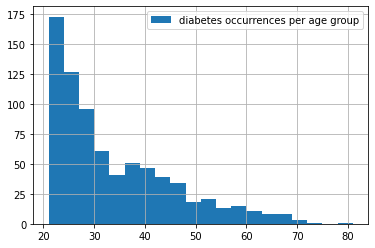


16. Combining features: 


C:\Users\xyz\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


{'accuracy': 0.72440946, 'accuracy_baseline': 0.6574803, 'auc': 0.78477526, 'auc_precision_recall': 0.63259757, 'average_loss': 0.5384639, 'label/mean': 0.34251967, 'loss': 0.5445296, 'precision': 0.59770113, 'prediction/mean': 0.39464667, 'recall': 0.59770113, 'global_step': 1000}


In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


#reading csv
df = pd.read_csv("pima-indians-diabetes.csv")

def get_requirements():
    print("\nProgram Requirements:")
    print("\n1. Automate data manipulation process.")
    print("\n2. Easily reproduce analysis on different datasets using similar formats - saves time.")
    print("\n3. Import necessary libraries.")
    print("\n4. Research how to install and missing packages, if necessary.")
    print("\n5. Give short, cogent answers to the following questions (in *your* words):")
    print("\n\ta. What is AI?")
    print("\n\tb. What is machine language?")
    print("\n\tc. What is deep learning and neural networks?")
    print("\n\td. What is natural language processing (NLP)?")
    print("\nResearch differences between TensorFlow and PyTorch")
    print("\n\ta. What are they used for?")
    print("\n\tb. List differences.")
    print("\n\tc. Why would you use one over the other?")
    print("\nDownload .csv dataset")
    print("\nCreate at least three functions that are called by the program:")
    print("\n\ta. main(): calls at least two other functions")
    print("\n\tb. get_requirements(): displays the program requirements")
    print("\n\tc. artificial_intelligence() displays the following data.")
    print("\nWhen running program:")
    print("\n\ta. Document any issues.")
    print("\n\tb. Document solutions attempted.")
    print("\n\tc. How good was data model -- compared to actual data (accuracy percentage)?")



def artificial_intelligence():
    tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
    print("1.Print indexes:\n")
    df.index = pd.RangeIndex(start=0,stop=768,step=1)
    print(df.index)

    print("2.Print columns:\n")
    print(df.columns)

    print("3.Print data frame:\n")
    print("Note: ")
    print(df)

    print("4.Print type:")
    print(type(df))

    print("5.Print attribute data types --object type represents strings")
    print(df.dtypes)

    print("6. Print values (truncated list), in array format:")
    print(df.values)

    print("7. Print index of all DataFrame column names:")
    print(list(df))

    print("8. Print DataFrame info (i.e., summary, similar to 'describe tablename;' in MySQL")
    print(df.info(verbose=True))

    print("9. Print *only* number of DataFrame rows:")
    print(len(df))

    print("10. Print *only* number of DataFrame columns")
    print(len(df.columns))

    print("11. Print number of DataFrame rows and columns: ")
    print(df.shape)

    print("12. Print number of DataFrame elements (i.e. rows * columns")
    print(df.size)

    print("\n13. Cleaning Data: ")
    all_cols = ['num_preg', 'gluc_concentrate', 'blood_press',
    'triceps', 'insulin', 'bmi', 'pedigree', 'age', 'class']
    #normalize data (scaling), eliminate skewed data: weight all columns between 0-1 (float values)
    #create lambda function to normalize (reshape) data
    #whatever is on right-side of colon is returned to variable on left-side (x)
    cols_to_norm = ['num_preg', 'gluc_concentrate', 'blood_press',
                    'triceps', 'insulin', 'bmi', 'pedigree']
    df[cols_to_norm] = df[cols_to_norm].apply(
        lambda x: (x - x.min()) / (x.max() - x.min()))

    print("\n14. Begin TensorFlow Analysis - create variables: ")
    num_preg = tf.feature_column.numeric_column('num_preg')
    plasma_gluc = tf.feature_column.numeric_column('gluc_concentrate')
    dias_press = tf.feature_column.numeric_column('blood_press')
    tricep = tf.feature_column.numeric_column('triceps')
    insulin = tf.feature_column.numeric_column('insulin')
    bmi = tf.feature_column.numeric_column('bmi')
    diabetes_pedigree = tf.feature_column.numeric_column('pedigree')
    age = tf.feature_column.numeric_column('age')

    print("15. Create (generic) categorical features (used for analysis):")
    assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
        'Group', ['A', 'B', 'C', 'D'])
    #convert continuous to categorical, bins=number of histogram bins used (edges, start to end)
    df['age'].hist(bins=20)
    plt.legend(['diabetes occurrences per age group'])
    plt.show()

    print("\n16. Combining features: ")
    age_groups = tf.feature_column.bucketized_column(
        age, boundaries=[20, 30, 40, 50, 60, 70, 80])
    #combine all features (using variables above)
    feat_cols = [num_preg, plasma_gluc, dias_press, tricep,
                insulin, bmi, diabetes_pedigree, age_groups]

    #splitting data (test_size = 33%)
    x_data = df.drop('class', axis=1)
    labels = df['class']
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, labels, test_size=0.33, random_state=101)

    # TensorFlow steps: train model with specific data
    # batch_size: how many lines are read at a time into model, and train it!
    # num_epochs: how many times to run over training model
    # shuffle: randomly selecting data and order

    #get same command from TensorFlow Version1 into Version2
    input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

    #create model
    #n_classes: result is 0 or 1 (i.e., have diabetes --or higher risk of diabetes, or not)
    #steps: number of times to run model
    model = tf.estimator.LinearClassifier (
        feature_columns=feat_cols, n_classes=2)
    model.train(input_fn=input_func, steps=1000)

    #prediction
    pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_test, batch_size=10, num_epochs=1, shuffle=False)

    predictions = model.predict(pred_input_func)
    list(predictions)

    #how good was data model--compared to actual data

    eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)
    results = model.evaluate(eval_input_func)
    print(results)



def main():
    get_requirements()
    artificial_intelligence()

main()